*This is the first data science project attemption*
# COVID-19 OPEN RESEARCH DATASET CHALLENGE (CORD-19)
# Covid-19 Analysis Task

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
cov19 = pd.read_csv(r"C:\Users\SUDE\OneDrive\Masaüstü\notebooks\worldometer_data.csv")

In [11]:
cov19.head(10)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
6,Peru,South America,3.301632e+07,455409,NaN,20424.0,NaN,310337.0,NaN,124648.0,1426.0,13793.0,619.0,2493429.0,75521.0,Americas
7,Chile,South America,1.913251e+07,366671,NaN,9889.0,NaN,340168.0,NaN,16614.0,1358.0,19165.0,517.0,1760615.0,92022.0,Americas
8,Colombia,South America,5.093626e+07,357710,NaN,11939.0,NaN,192355.0,NaN,153416.0,1493.0,7023.0,234.0,1801835.0,35374.0,Americas
9,Spain,Europe,4.675665e+07,354530,NaN,28500.0,NaN,NaN,NaN,NaN,617.0,7582.0,610.0,7064329.0,151087.0,Europe


In [12]:
cov19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country/Region    209 non-null    object 
 1   Continent         208 non-null    object 
 2   Population        208 non-null    float64
 3   TotalCases        209 non-null    int64  
 4   NewCases          4 non-null      float64
 5   TotalDeaths       188 non-null    float64
 6   NewDeaths         3 non-null      float64
 7   TotalRecovered    205 non-null    float64
 8   NewRecovered      3 non-null      float64
 9   ActiveCases       205 non-null    float64
 10  Serious,Critical  122 non-null    float64
 11  Tot Cases/1M pop  208 non-null    float64
 12  Deaths/1M pop     187 non-null    float64
 13  TotalTests        191 non-null    float64
 14  Tests/1M pop      191 non-null    float64
 15  WHO Region        184 non-null    object 
dtypes: float64(12), int64(1), object(3)
memory u

In [13]:
# total tests of the country that has total deaths are greater than 100000
cov19.loc[cov19["TotalDeaths"] > 100000, "TotalTests"]

0    63139605.0
Name: TotalTests, dtype: float64

In [14]:
# spesific country-based total deaths info caused by covid-19
for index, row in cov19.iterrows():
    if(row["Country/Region"] == "Turkey"):
        display(row[["Country/Region", "TotalDeaths"]])

Country/Region    Turkey
TotalDeaths       5798.0
Name: 16, dtype: object

In [15]:
# the number of countries gathered
cov19["Country/Region"].nunique()

209

### Null Values Analysis and Data Cleaning 

In [16]:
pd.isnull(cov19)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
2,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
3,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
4,False,False,False,False,True,False,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,False,False,False,False,True,False,True,False,True,False,True,False,False,False,False,True
205,False,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True
206,False,False,False,False,True,True,True,False,True,False,True,False,True,False,False,True
207,False,False,False,False,True,True,True,False,True,False,True,False,True,True,True,False


In [17]:
# countries ,whose all values are stated, detailed
cov19_2 = cov19.dropna()
cov19_2

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
5,Mexico,North America,129066160.0,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
28,Bolivia,South America,11688459.0,86423,1282.0,3465.0,80.0,27373.0,936.0,55585.0,71.0,7394.0,296.0,183583.0,15706.0,Americas
72,S. Korea,Asia,51273732.0,14519,20.0,303.0,1.0,13543.0,42.0,673.0,18.0,283.0,6.0,1613652.0,31471.0,WesternPacific


In [79]:
cov19["WHO Region"].nunique()

6

In [82]:
cov19["WHO Region"].drop_duplicates(keep="first").dropna()

0                 Americas
2           South-EastAsia
3                   Europe
4                   Africa
10    EasternMediterranean
21          WesternPacific
Name: WHO Region, dtype: object

### Data Visualization

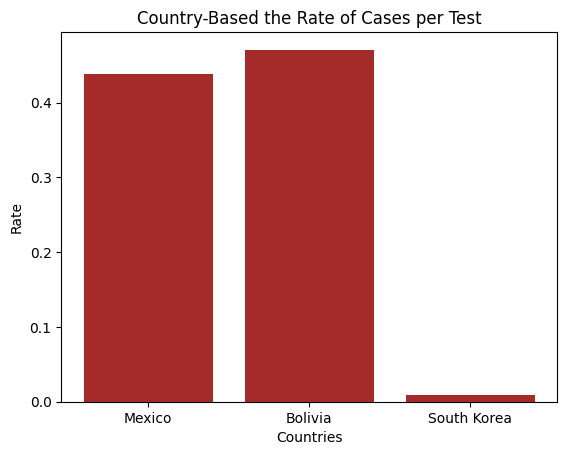

In [35]:
rate = cov19_2.TotalCases / cov19_2.TotalTests
c = np.array(["Mexico", "Bolivia", "South Korea"])

plt.bar(c, rate, color = "Brown")
plt.title('Country-Based the Rate of Cases per Test')
plt.ylabel('Rate', fontsize=10)
plt.xlabel('Countries', fontsize=10)
plt.show()

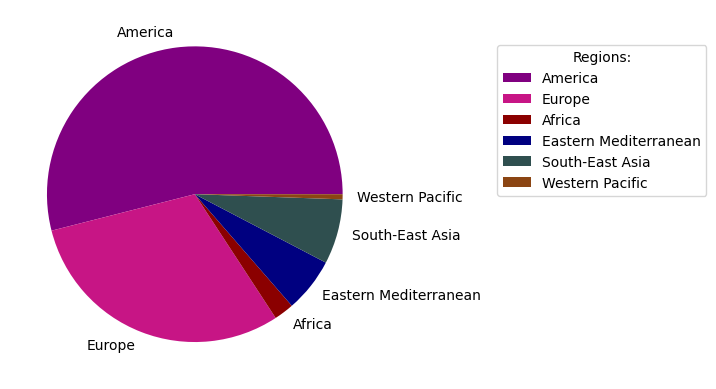

In [116]:
# "total deaths" sum of each region
a = cov19.loc[cov19["WHO Region"] == "Americas"].TotalDeaths.sum()
b = cov19.loc[cov19["WHO Region"] == "Europe"].TotalDeaths.sum()
c = cov19.loc[cov19["WHO Region"] == "Africa"].TotalDeaths.sum()
d = cov19.loc[cov19["WHO Region"] == "EasternMediterranean"].TotalDeaths.sum()
e = cov19.loc[cov19["WHO Region"] == "South-EastAsia"].TotalDeaths.sum()
f = cov19.loc[cov19["WHO Region"] == "WesternPacific"].TotalDeaths.sum()

tDeaths = np.array([a, b, c, d, e, f]) 
region = ["America", "Europe", "Africa", "Eastern Mediterranean", "South-East Asia", "Western Pacific"]
color = ["#800080", "#C71585", "#8B0000", "#000080", "#2F4F4F", "#8B4513"]

plt.pie(tDeaths, labels = region, colors = color)
plt.legend(title = "Regions:", loc="center left", bbox_to_anchor=(1.3, 0.2, 1, 1))
plt.show()